---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.binomial(1, 0.5, 10) #trial, probability of success, size

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [3]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

98 tornadoes back to back in 2739.72602739726 years


In [4]:
np.random.uniform(0, 1) #uniformly distributed over the half-open interval [low, high) 

0.5342620078304594

In [5]:
np.random.normal(0.75) #loc: mean of the distribution.

1.218355908932357

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [6]:
distribution = np.random.normal(0.75,size=10)
distribution

array([-0.3571156 ,  1.06808278,  2.07785245,  2.44419908,  0.65921792,
       -0.40593133,  0.37830557,  1.79926763, -0.97659624, -1.2338992 ])

In [7]:
np.std(distribution), np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

(1.2264603011857769, 1.2264603011857769)

In [8]:
np.random.normal(loc = 0, scale = 5, size = 10) # center, standard diviation, size

array([-4.08322379,  2.21316129, -1.87216979, -5.8302196 , -7.01295157,
        5.24787661,  2.27955383, -3.43576676,  1.65828783,  4.50351303])

In [9]:
std_2 = np.random.normal(0, 2, 100) #with positive excess kurtosis is called leptokurtic (slender)
std_5 = np.random.normal(0, 5, 100) #with negative excess kurtosis is called platykurtic (broad)
import scipy.stats as stats
stats.kurtosis(std_2), stats.kurtosis(std_5)

(-0.14004000372881276, 0.12388122301696836)

In [10]:
chi_squared_df2 = np.random.chisquare(df = 2, size=10000) # df: number of degrees of freedom.
chi_squared_df5 = np.random.chisquare(df = 5, size=10000)
stats.skew(chi_squared_df2), stats.skew(chi_squared_df5) #positive skew: the right tail is longer

(2.0710262765672725, 1.2995824744840816)

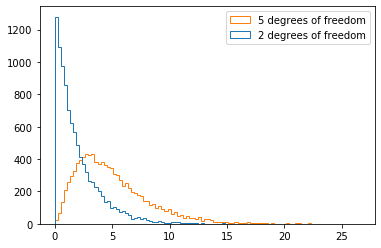

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=100, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [12]:
df = pd.read_csv('data\grades.csv')

In [13]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [14]:
len(df)

2315

In [15]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [16]:
len(early), len(late)

(1256, 1059)

In [17]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [18]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

## Calculate the T-test for the means of two independent samples of scores

We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [19]:
from scipy import stats
stats.ttest_ind?

In [20]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [21]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067964)

In [22]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)

In [23]:
stats.ttest_ind(early['assignment4_grade'], late['assignment4_grade'])

Ttest_indResult(statistic=0.16232182017140787, pvalue=0.8710666110447575)

In [24]:
stats.ttest_ind(early['assignment5_grade'], late['assignment5_grade'])

Ttest_indResult(statistic=0.06063973879942835, pvalue=0.9516513635792874)

In [25]:
stats.ttest_ind(early['assignment6_grade'], late['assignment6_grade'])

Ttest_indResult(statistic=-0.00976775475765312, pvalue=0.9922074255698552)

In [26]:
stats.ttest_ind(df['assignment1_grade'], df['assignment1_grade'])

Ttest_indResult(statistic=0.0, pvalue=1.0)